# Assignment 1 - Regression Models
### Submitted By:- Hemang Sharma (24695785)

## Part B: Experiment on multivariate linear regression. 

In this section, we will be creating two multivariate linear regression models. The second model is subset of the features (['avgAnnCount', 'incidenceRate', 'medIncome', 'popEst2015', 'povertyPercent']) for the multivariate linear regression model, trains the model using the training data, and evaluates its performance on both the training and test data.

Baseline mean squared error: 601.8066308092469
For our multivariate linear regression model:

MSE: 450.9372592193991
Mean Absolute Error: 16.357179639018987
Coefficients:  [[-2.28107707e-03  1.00510579e-02  2.08018560e-01 -3.27197444e-04
  -1.19353976e-05  3.92790885e-02 -3.15421178e-05 -4.24717025e-01
  -5.29080350e-01  1.25697743e-01]]
Intercept:  [153.48271767]



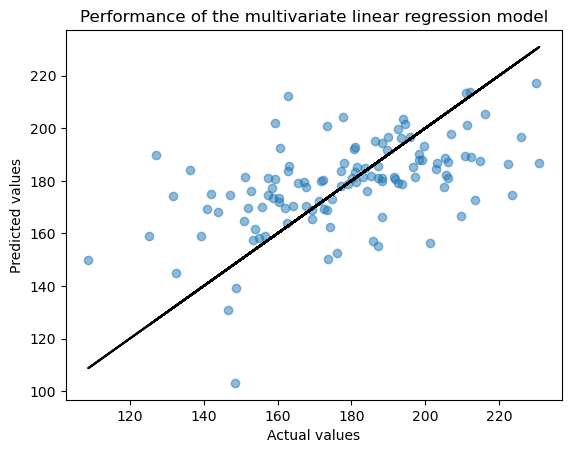

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mae
import altair as alt

# Load the training dataset
train_data = pd.read_csv('cancer_us_county-training.csv')
test_data = pd.read_csv('cancer_us_county-testing.csv')
test_data.dropna(how='any', inplace=True)
train_data.dropna(how='any', inplace=True)

# Select all numeric features for multivariate linear regression
features = ['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome',
            'popEst2015', 'povertyPercent', 'studyPerCap', 'PctEmployed16_Over',
            'PctPrivateCoverage', 'PctPublicCoverage']

# Extract the features and target variable as numpy arrays
X_train = train_data[features].values
y_train = train_data['TARGET_deathRate'].values.reshape(-1, 1)

X_test = test_data[features].values
y_test = test_data['TARGET_deathRate'].values.reshape(-1, 1)

# Train the initial model with all features
reg = LinearRegression().fit(X_train, y_train)

# Assess the baseline model
baseline_pred = np.full_like(y_test, y_train.mean())
baseline_mse = mean_squared_error(y_test, baseline_pred)
print("Baseline mean squared error:", baseline_mse)

# Make predictions using the model
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mae(y_test, y_pred)
print('For our multivariate linear regression model:', end='\n\n')
print('MSE:', mse)
print('Mean Absolute Error:', mae)
# print the coefficients and intercept of the model
print("Coefficients: ", reg.coef_)
print("Intercept: ", reg.intercept_, end='\n\n')

# Plot the predicted values of the test data against the actual values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot(y_test, y_test, color='black')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Performance of the multivariate linear regression model')
plt.show()


This code loads the training and test datasets, selects all numeric features for the multivariate linear regression, extracts the features and target variable as numpy arrays, trains the initial model with all features, assesses the baseline model, makes predictions using the model on the test data, calculates the MSE and MAE for the test data, and plots the predicted values of the test data against the actual values to visually inspect the performance of the models for Part A.

The code also compares the MSE with the baseline MSE to see how much better the model performs compared to simply predicting the mean of the training target variable for all test data points.

The output of this code will show the baseline mean squared error, the MSE and MAE for the multivariate linear regression model, the coefficients and intercept of the model, and a scatter plot of the predicted values of the test data against the actual values.

The scatter plot shows how well the predicted values of the test data match the actual values. If the predicted values are close to the actual values, then the model is performing well. If the predicted values are far from the actual values, then the model is not performing well. The diagonal line in the scatter plot represents a perfect match between the actual and predicted values, and the closer the points are to this line, the better the model is performing.

For Our Second multivariate linear regression model with fewer features

MSE for training data: 521.5510489687584
Mean Absolute Error for training data: 16.32459550322298
MSE for test data: 477.07279521201883
Mean Absolute Error for test data: 16.819920852603918


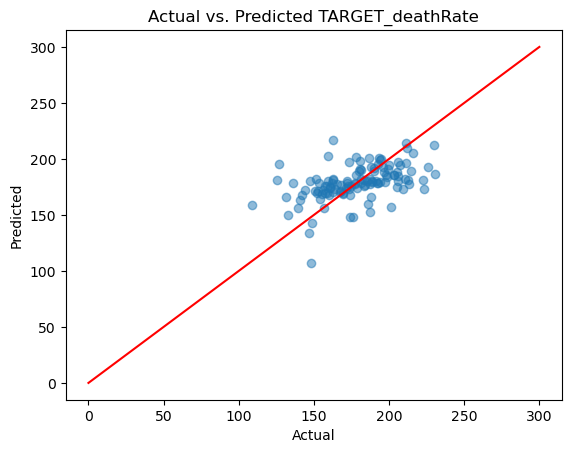

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mae
import altair as alt

# Load the training dataset
train_data = pd.read_csv('cancer_us_county-training.csv')
test_data = pd.read_csv('cancer_us_county-testing.csv')
test_data.dropna(how='any', inplace=True)
train_data.dropna(how='any', inplace=True)
# Select features for multivariate linear regression
features = ['avgAnnCount', 'incidenceRate', 'medIncome', 'popEst2015', 'povertyPercent']

# Extract the features and target variable as numpy arrays
X_train = train_data[features].values
y_train = train_data['TARGET_deathRate'].values.reshape(-1, 1)

X_test = test_data[features].values
y_test = test_data['TARGET_deathRate'].values.reshape(-1, 1)

# Train the linear regression model
reg2 = LinearRegression().fit(X_train, y_train)

# Evaluate the model on the training data
y_pred_train = reg2.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mae(y_train, y_pred_train)
print('For Our Second multivariate linear regression model with fewer features', end='\n\n')
print('MSE for training data:', mse_train)
print('Mean Absolute Error for training data:', mae_train)

# Evaluate the model on the test data
y_pred_test = reg2.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mae(y_test, y_pred_test)
print('MSE for test data:', mse_test)
print('Mean Absolute Error for test data:', mae_test)

# Plot the predicted values against the actual values for the test data
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot(np.linspace(0, 300, 100), np.linspace(0, 300, 100), color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted TARGET_deathRate')
plt.show()

The output will show the MSE and MAE for both the training and test data, and the plot will show the predicted values of the test data against the actual values. The red line in the plot represents a perfect prediction, where the predicted values are equal to the actual values. The closer the blue dots are to the red line, the better the model's performance.